# AI2619 Programming Homework 2

This homework is mainly about sampling and performing Fourier Transform on a rectangular window function.

## Creating the rectangular window function

A function is a generator which yields values for given inputs. In this case, we will use a function to denote an analog function:

$$x(t)=\begin{cases}
1 & 0<t<10 \\
0 & \text{o.w.}
\end{cases}$$

In [1]:
# Preparations
import math
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]
})

# Define class for analog signals. Supports addition.
class analog_signal:
    def time_shift(self, t):
        self.shift = t
        return self.shift
    def sample(self, t):
        return self.function(t + self.shift)
    def __init__(self, name, func):
        self.name = name
        self.shift = 0
        self.function = func
    def __repr__(self):
        return f'<analog_signal name={self.name}>'
    def __add__(self, other):
        if type(other) == analog_signal:            
            def sum_func(t):
                return self.sample(t) + other.sample(t)
            return analog_signal(f'Sum({self.name}, {other.name})', sum_func)
        else:
            raise TypeError('Analog signals can only be added to other analog signals')

def rectangular_window(t):
    if t < 10 and t >= 0:
        return 1
    else:
        return 0

def sinusoid(t):
    return math.sin(2 * math.pi * t)

rectangular_window_signal = analog_signal('RectangularWindow(10)', rectangular_window)
sinusoid_signal = analog_signal('Sinusoid(2)', sinusoid)


## Task 1

In this task, we need to sample the `analog_function` at a given time interval $t_s$. This is pretty confusing, because the starting point and the ending point are up for me to decide. Here I will try 4 different sampling methods:

- Sample from $[0, 1]$
- Sample from $[0, 10]$
- Sample from $[0, 25]$
- Sample from $[0, 100]$

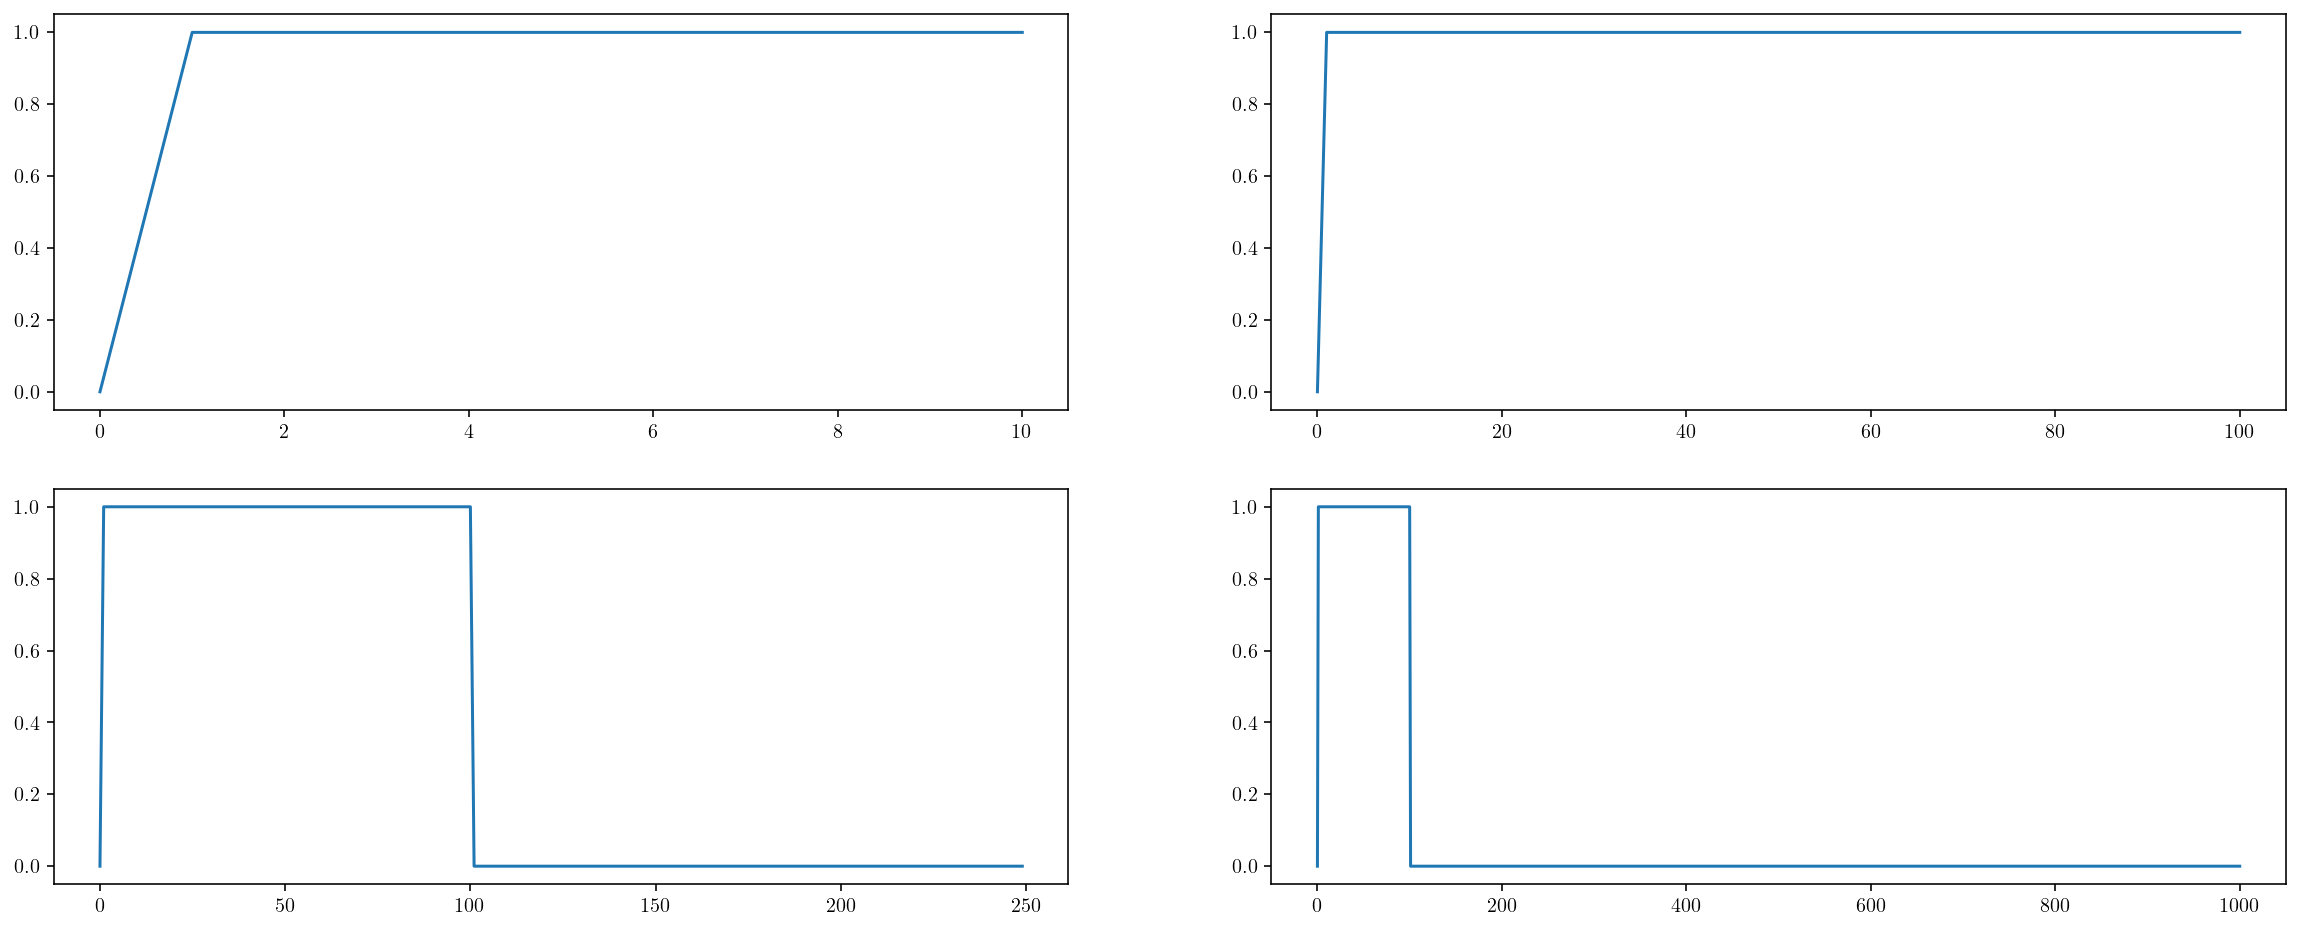

In [14]:
interval = 0.1 # Because the problem requires it
sample_1 = []
sample_2 = []
sample_3 = []
sample_4 = []
playground = []

def sample(signal, start, end, interval):
    sample_output = []
    time = start
    while time < end:
        sample_output.append(signal.sample(time))
        time += interval
    return sample_output

# Samples
sample_1 = sample(rectangular_window_signal, 0, 1, interval)
sample_2 = sample(rectangular_window_signal, 0, 10, interval)
sample_3 = sample(rectangular_window_signal, 0, 25, interval)
sample_4 = sample(rectangular_window_signal, 0, 100, interval)
# Playground
playground = sample(sinusoid_signal, 0, 5, interval)

plt.figure(figsize=(20, 8))
plt.subplot(221)
plt.plot(sample_1)
plt.subplot(222)
plt.plot(sample_2)
plt.subplot(223)
plt.plot(sample_3)
plt.subplot(224)
plt.plot(sample_4)
# Save the image
plt.savefig('task_1_time.png', dpi=440)

Here we are about to implement **discrete-time fast fourier transform**. The discrete-time fast fourier transform is a method to transform a signal from time domain to frequency domain. Here, we will complete the function **without using the help of `NumPy`**, and compare the results to the results from `NumPy`.

In [3]:
# Discrete Fourier Transform for samples
def dft(sample):
    # This implementation is numpy-free
    N = len(sample)
    dft_output = []
    # Perform DFT
    for k in range(N):
        sum = 0
        for n in range(N):
            sum += sample[n] * math.cos(2 * math.pi * n * k / N)
        dft_output.append(sum)
    # Shift on frequency domain
    dft_output = dft_output[int(N/2):] + dft_output[:int(N/2)]
    return dft_output

def dft_np(_sample):
    # This implementation relies on numpy
    sample = _sample.copy()
    sample = np.fft.fft(sample)
    sample = np.fft.fftshift(sample)
    return np.real(sample)


Then we use both functions to plot the signals on frequency domain. The numpy-free version is demonstrated before the numpy-based version.

Time elapsed for performing DFT: 0.16299748420715332


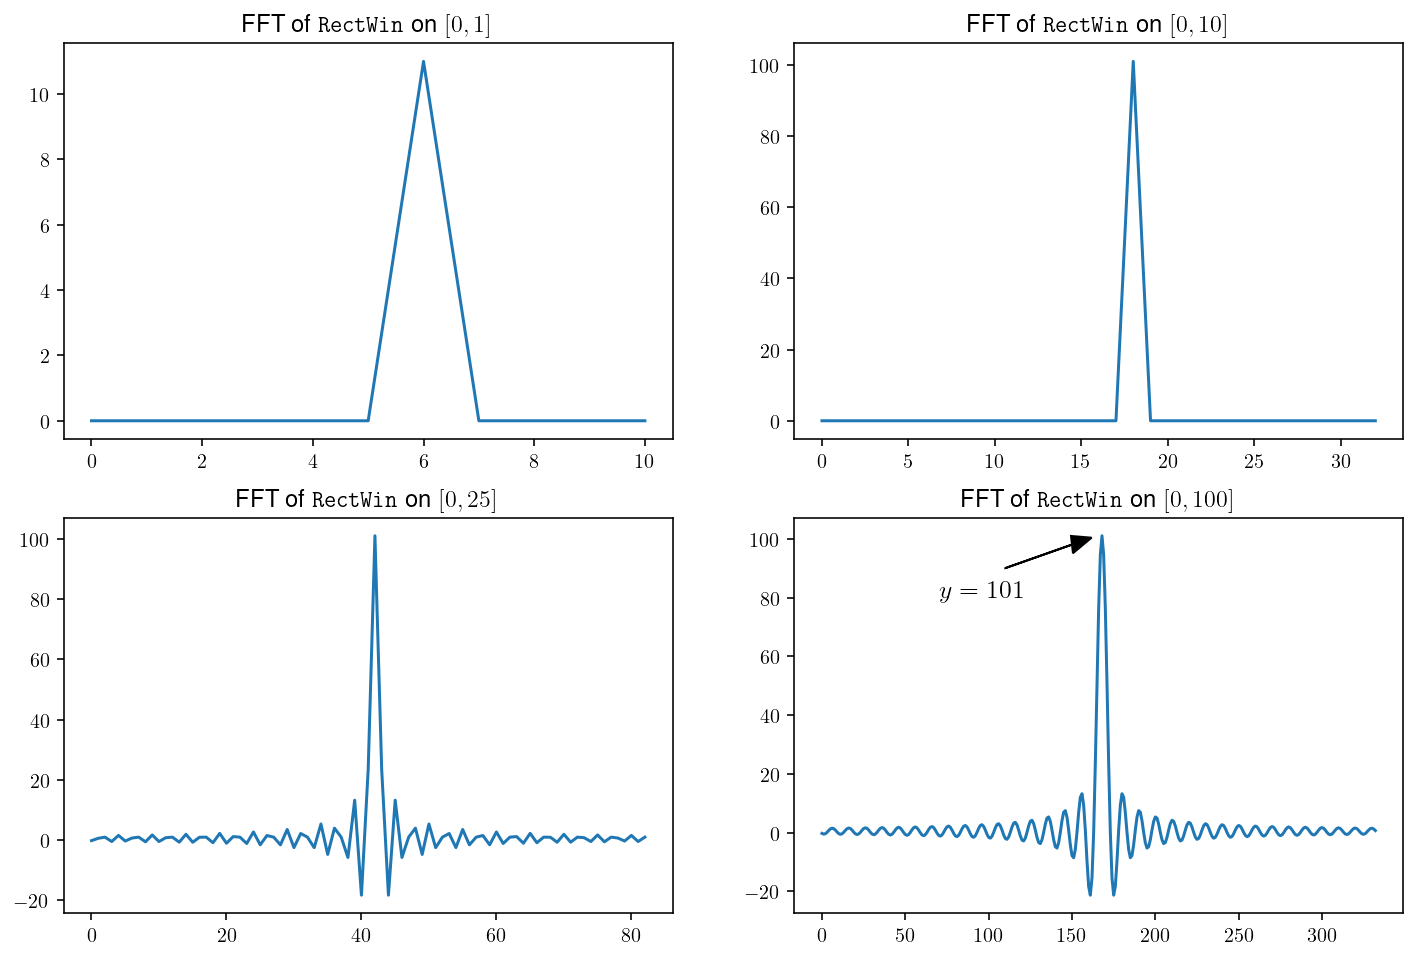

In [12]:
import time
t = time.time()
sample_1_fft = dft(sample_1)
sample_2_fft = dft(sample_2)
sample_3_fft = dft(sample_3)
sample_4_fft = dft(sample_4)
print("Time elapsed for performing DFT:", time.time() - t)

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title(r"FFT of $\mathtt{RectWin}$ on $[0, 1]$")
plt.plot(sample_1_fft)
plt.subplot(222)
plt.title(r"FFT of $\mathtt{RectWin}$ on $[0, 10]$")
plt.plot(sample_2_fft[len(sample_2_fft)//3:len(sample_2_fft)//3*2])
plt.subplot(223)
plt.title(r"FFT of $\mathtt{RectWin}$ on $[0, 25]$")
plt.plot(sample_3_fft[len(sample_3_fft)//3:len(sample_3_fft)//3*2])
plt.subplot(224)
plt.title(r"FFT of $\mathtt{RectWin}$ on $[0, 100]$")
plt.plot(sample_4_fft[len(sample_4_fft)//3:len(sample_4_fft)//3*2])
# Point of interest: the maximum value on the plot
plt.arrow(110, 90, 40, 8, head_width=6, head_length=12, fc='k', ec='k')
plt.text(70, 80, r"$y=101$", fontsize=13)

Time elapsed for performing DFT using numpy: 0.0009932518005371094


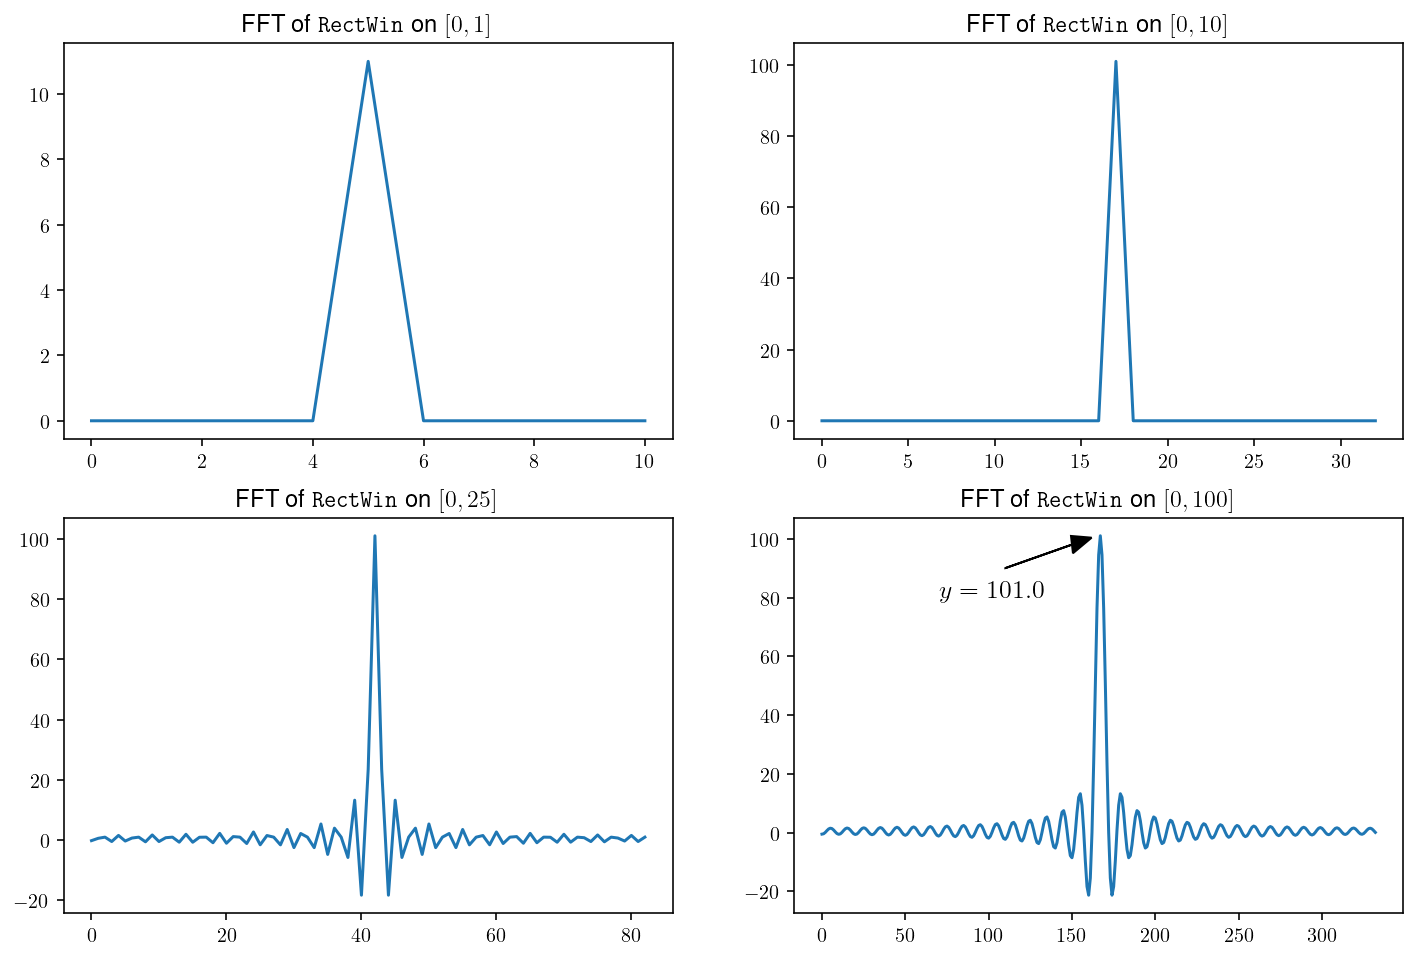

In [13]:
t = time.time()
sample_1_fft = dft_np(sample_1)
sample_2_fft = dft_np(sample_2)
sample_3_fft = dft_np(sample_3)
sample_4_fft = dft_np(sample_4)
print("Time elapsed for performing DFT using numpy:", time.time() - t)

plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title(r"FFT of $\mathtt{RectWin}$ on $[0, 1]$")
plt.plot(sample_1_fft)
plt.subplot(222)
plt.title(r"FFT of $\mathtt{RectWin}$ on $[0, 10]$")
plt.plot(sample_2_fft[len(sample_2_fft)//3:len(sample_2_fft)//3*2])
plt.subplot(223)
plt.title(r"FFT of $\mathtt{RectWin}$ on $[0, 25]$")
plt.plot(sample_3_fft[len(sample_3_fft)//3:len(sample_3_fft)//3*2])
plt.subplot(224)
plt.title(r"FFT of $\mathtt{RectWin}$ on $[0, 100]$")
plt.plot(sample_4_fft[len(sample_4_fft)//3:len(sample_4_fft)//3*2])
# Point of interest: the maximum value on the plot
plt.arrow(110, 90, 40, 8, head_width=6, head_length=12, fc='k', ec='k')
plt.text(70, 80, f"$y={max(np.abs(sample_4_fft))}$", fontsize=13)
# Save the image
plt.savefig('task_1_freq.png', dpi=440)

## Task 2

In this task we re-sample the time-shifted rectangular window function by $0.5 t_s$, and perform discrete Fourier Transform again.

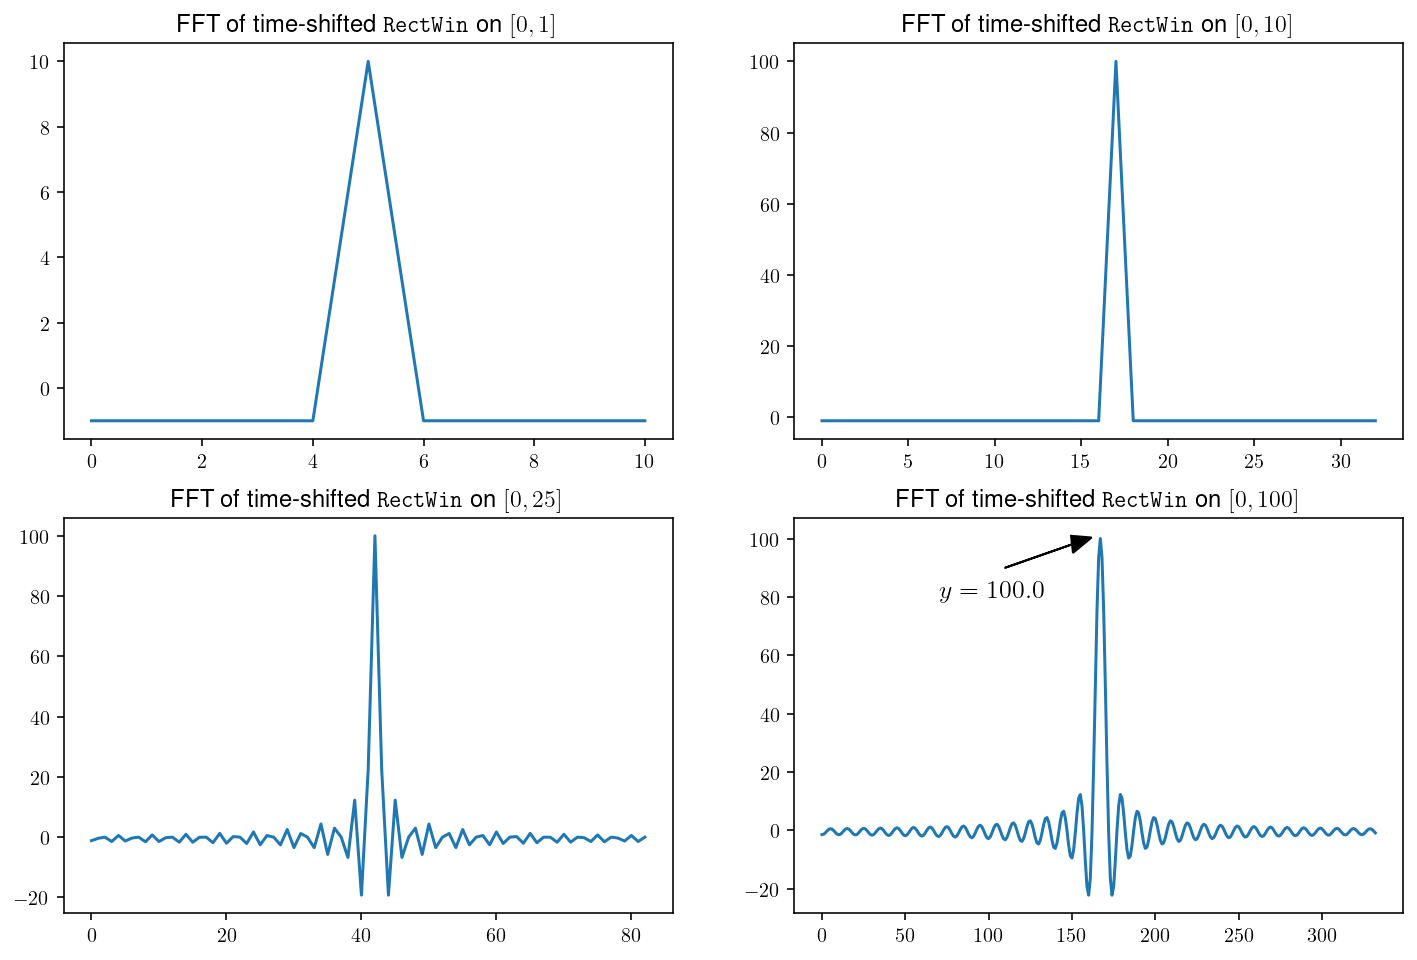

In [15]:
# Time-shift the analog rectangular_window_signal
rectangular_window_signal.time_shift(-0.5 * interval)

# Re-sample
sample_1_timeshift = sample(rectangular_window_signal, 0, 1, interval)
sample_2_timeshift = sample(rectangular_window_signal, 0, 10, interval)
sample_3_timeshift = sample(rectangular_window_signal, 0, 25, interval)
sample_4_timeshift = sample(rectangular_window_signal, 0, 100, interval)

# Discrete Fourier Transform for samples
sample_1_timeshift_fft = dft_np(sample_1_timeshift)
sample_2_timeshift_fft = dft_np(sample_2_timeshift)
sample_3_timeshift_fft = dft_np(sample_3_timeshift)
sample_4_timeshift_fft = dft_np(sample_4_timeshift)

# Plot the FFTs
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.title(r"FFT of time-shifted $\mathtt{RectWin}$ on $[0, 1]$")
plt.plot(sample_1_timeshift_fft)
plt.subplot(222)
plt.title(r"FFT of time-shifted $\mathtt{RectWin}$ on $[0, 10]$")
plt.plot(sample_2_timeshift_fft[len(sample_2_timeshift_fft)//3:len(sample_2_timeshift_fft)//3*2])
plt.subplot(223)
plt.title(r"FFT of time-shifted $\mathtt{RectWin}$ on $[0, 25]$")
plt.plot(sample_3_timeshift_fft[len(sample_3_timeshift_fft)//3:len(sample_3_timeshift_fft)//3*2])
plt.subplot(224)
plt.title(r"FFT of time-shifted $\mathtt{RectWin}$ on $[0, 100]$")
plt.plot(sample_4_timeshift_fft[len(sample_4_timeshift_fft)//3:len(sample_4_timeshift_fft)//3*2])
plt.arrow(110, 90, 40, 8, head_width=6, head_length=12, fc='k', ec='k')
plt.text(70, 80, f"$y={max(np.abs(sample_4_timeshift_fft))}$", fontsize=13)
# Save the image
plt.savefig('task_2_freq.png', dpi=440)

It seems that the resulting images are not very different from the previous ones. It is rather expected, as the samples are almost equal to the previous samples. But the actual results are not exactly identical:

The max value on the frequency domain for time-shifted sample_1: 10.0
The max value on the frequency domain for original sample_1 11.0
The max value on the frequency domain for time-shifted sample_4: 100.0
The max value on the frequency domain for original sample_4 101.0


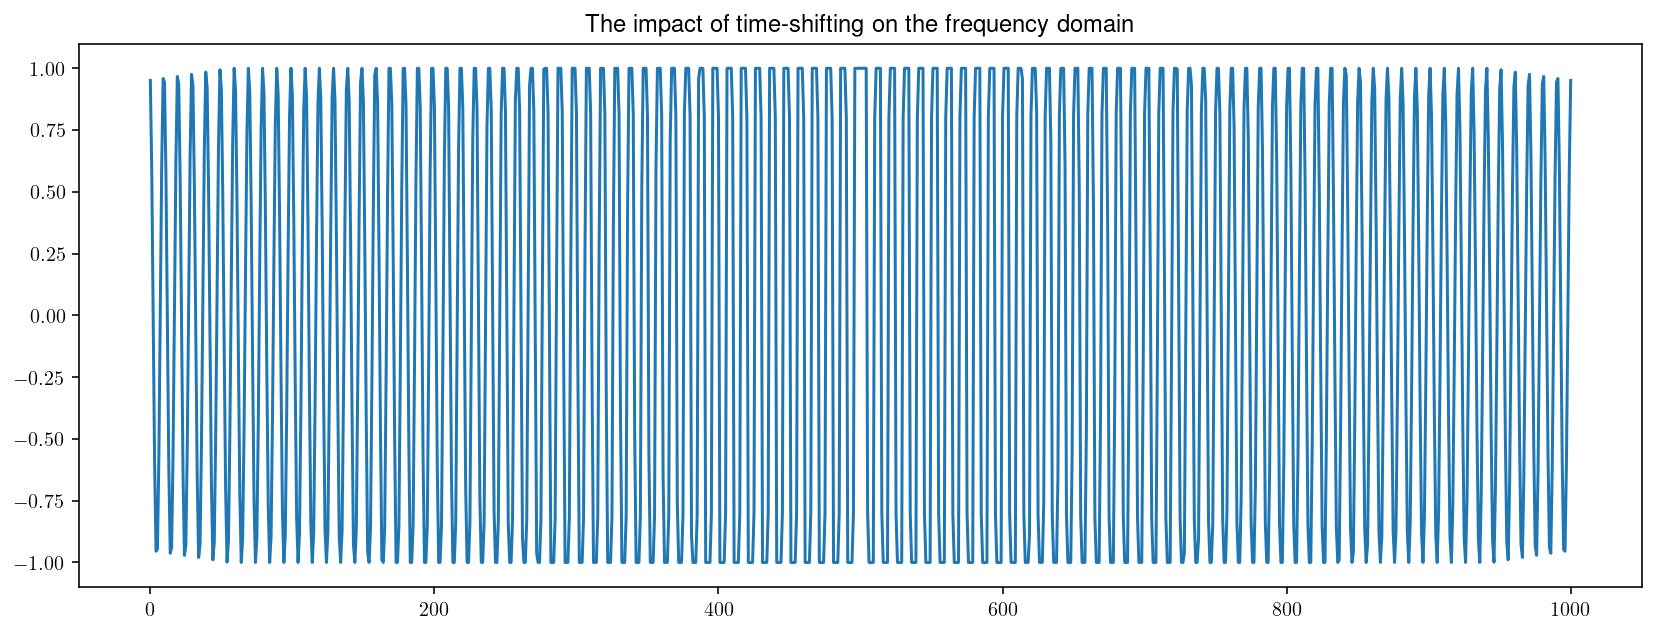

In [7]:
print("The max value on the frequency domain for time-shifted sample_1:", max(np.abs(sample_1_timeshift_fft)))
print("The max value on the frequency domain for original sample_1", max(np.abs(sample_1_fft)))
print("The max value on the frequency domain for time-shifted sample_4:", max(np.abs(sample_4_timeshift_fft)))
print("The max value on the frequency domain for original sample_4", max(np.abs(sample_4_fft)))
plt.figure(figsize=(14,5))
plt.title("The impact of time-shifting on the frequency domain")
plt.plot(np.abs(sample_4_fft) - np.abs(sample_4_timeshift_fft))

The peak is reduced by $1$ when the signal is time-shifted by $0.5t_s$, and the rest part all suffers from a value change (within range $(-1,1)$. In fact, the time-shifted samples contain an extra $0$ in front of the original signal.

## Task 3

This task involves sampling the time-shifted signal with a low-pass filter.

In [8]:
# Create a low-pass filter
def low_pass_filter(arr, ratio=4):
    # Frequency-domain low-pass filter
    # Time the function
    arr = np.fft.fft(arr)
    arr = np.fft.fftshift(arr)
    arr[0:len(arr)//ratio] = 0
    # Return to time-domain
    arr = np.fft.ifftshift(arr)
    arr = np.fft.ifft(arr)
    return arr

Then, we plot the `sample_3` and `sample_4` - low-passed and before - on both the time-domain and the frequency-domain, as requested by the task.

C:\Program Files\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


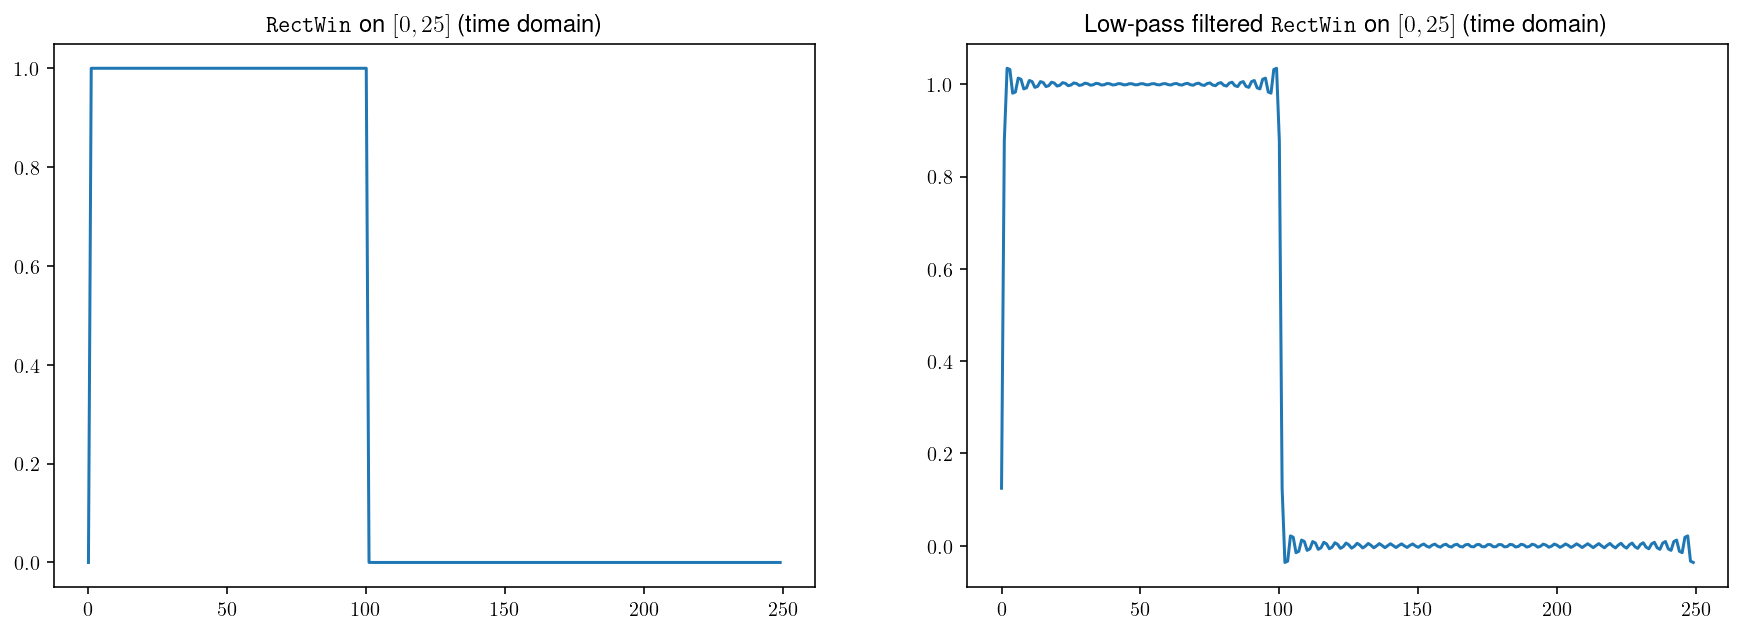

In [16]:
# Time-domain characteristics
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title(r"$\mathtt{RectWin}$ on $[0, 25]$ (time domain)")
plt.plot(sample_3)
plt.subplot(122)
plt.title(r"Low-pass filtered $\mathtt{RectWin}$ on $[0, 25]$ (time domain)")
plt.plot(low_pass_filter(sample_3))
# Save the image
plt.savefig('task_3_time.png', dpi=440)

C:\Program Files\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


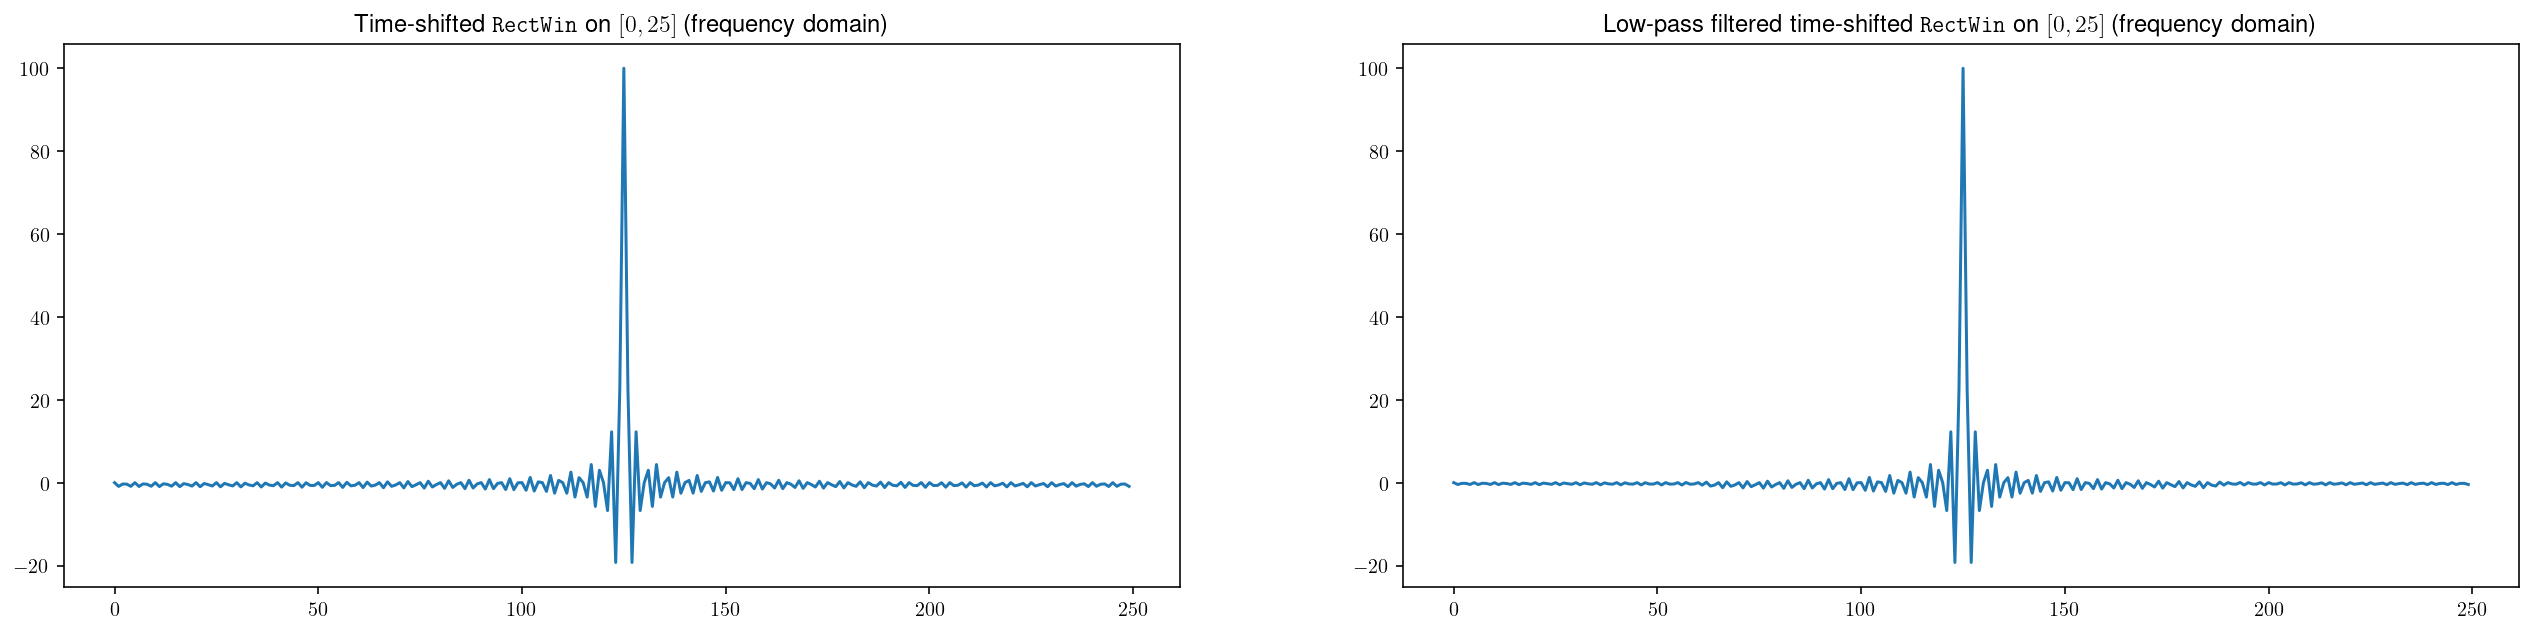

In [17]:
# Frequency-domain characteristics
plt.figure(figsize=(22,5))
plt.subplot(121)
plt.title(r"Time-shifted $\mathtt{RectWin}$ on $[0, 25]$ (frequency domain)")
plt.plot(sample_3_timeshift_fft)
plt.subplot(122)
plt.title(r"Low-pass filtered time-shifted $\mathtt{RectWin}$ on $[0, 25]$ (frequency domain)")
sample_3_timeshift_lowpass_fft = dft(low_pass_filter(sample_3))
plt.plot(sample_3_timeshift_lowpass_fft)
# Save the image
plt.savefig('task_3_freq.png', dpi=440)

We see that the above frequency-domain plots are almost the same on the low frequency part, but the high frequency part is almost zero-ed out for the low-passed signal.

To prove that the phenomenon we observed is correct, we then plot the difference of the two frequency-domain plots below:

C:\Program Files\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


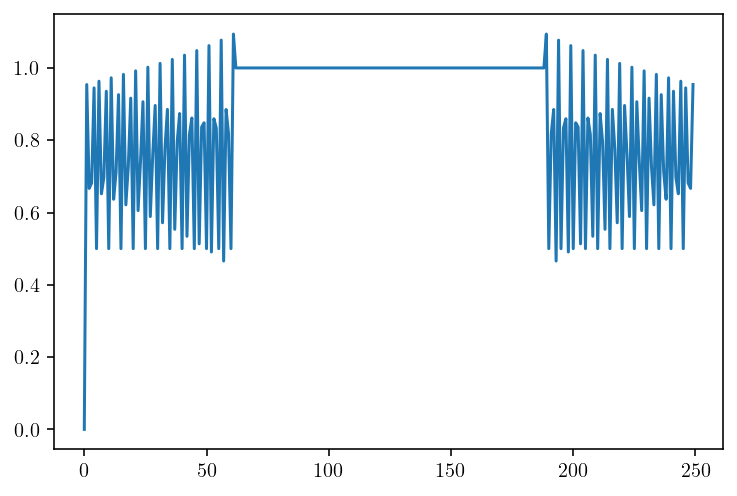

In [11]:
plt.plot(sample_3_timeshift_lowpass_fft - sample_3_timeshift_fft)

We can see that the high-frequency part is almost completely lost after passing the signal to the low-pass filter.

## Task 4

This task involves logical deductions of the above phenomena we just observed.

### Explaining Task 1

> The resulting plot on frequency-domain is very similar to that of a $\operatorname{sinc}$ function.

The main characteristic of the rectangular window function on the frequency-domain is a sharp peak at $0$, and a vibrating waveform as frequency increases.

First, we sampled the analog signal:

$$x[n] = x(n) \cdot \sum_{-\infty}^{\infty} \delta(t-nt_s)$$

Then, the Fourier Transform:

$$\begin{aligned}
X[k]&=\sum_{n=0}^{N-1} x[n] \cdot \mathrm{e}^{\frac{-\mathrm{j} 2\pi nk}{N}} \\
&= \sum_{n=0}^{10 f_s} \mathrm{e}^{\frac{-\mathrm{j} 2\pi nk}{N}} \\
&= \dfrac{1-\mathrm{e}^{-\mathrm{j}\frac{20 \pi f_s n}{N}}}{1-\mathrm{e}^{-\mathrm{j}\frac{2\pi n}{N}}} \\
\end{aligned}$$

### Explaining Task 2

After time shifting, the rectangular window function becomes $x(t-0.5t_s)$. After sampling, the resulting array (discrete-time signal) is:

$$x[n]=\begin{cases} 1, &1\leq n \leq 201 \\ 0 & \text{o.w.} \end{cases}$$

Perform DTFT on the signal:

$$\begin{aligned}
X[k]&=\sum_{n=0}^{N-1} x[n] \cdot \mathrm{e}^{\frac{-\mathrm{j} 2\pi nk}{N}} \\
&= \sum_{n=0}^{10 f_s} \mathrm{e}^{\frac{-\mathrm{j} 2\pi nk}{N}} \\
&= \dfrac{\mathrm{e}^{-\mathrm{j} \frac{2\pi n}{N}}-\mathrm{e}^{-\mathrm{j}\frac{20 \pi f_s n}{N}}}{1-\mathrm{e}^{-\mathrm{j}\frac{2\pi n}{N}}} \\
\end{aligned}$$

### Explaining Task 3

We then send the signal to a low-pass filter, whose frequency domain is:

$$\begin{aligned}
X(\mathrm{e}^{j\omega}) &= \begin{cases}
\sum_{n=1}^{10 f_s} \mathrm{e}^{-\mathrm{j} \omega n} & |\omega| \in [0, \rho] \\
0 & \text{o.w.}
\end{cases}
\end{aligned}$$

Where $\rho$ is defined by the cutoff of the low-pass filter, here we choose $\rho = 0.6 \pi$.

In frequency domain:

$$X\left(\mathrm{e}^{\mathrm{j}\omega}\right)=\sum_{n=1}^{10f_s}\mathrm{e}^{-\mathrm{j} \omega n} \cdot \operatorname{rect}\left(\dfrac{\omega}{0.6 \pi}\right)$$

The respective signal in time domain is:

$$\begin{aligned}
x[n] &= x\left(nT_s-\dfrac{1}{2}T_s\right) * 0.6 \pi \operatorname{sinc} (\rho n T_s) \\
&= \sum_{k=1}^{10 f_s} \rho \operatorname{sinc}\left(\rho T_s (n-k)\right)
\end{aligned}$$

The DFT result:

$$X[k] = \dfrac{\mathrm{e}^{-\mathrm{j}\frac{2\pi n}{N}}-\mathrm{e}^{-\mathrm{j}\frac{20 \pi f_s n}{N}} }{ 1-\mathrm{e}^{-\mathrm{j}\frac{2 \pi n}{N}} }\mathrm{e}^{-\mathrm{j}\frac{2\pi n}{N}} \operatorname{rect}\left(\dfrac{\omega}{\rho}\right)$$

## Special Thanks

During the process of completing the project, I received lots of help from Prof. Yuye Ling. Thanks for his patience and support.

Also I'd like to mention Yihang Qiu and Xiangyun Rao, two classmates of mine, who helped me along the implementation of DFT and DTFT in Python, as well as the Task 4. Without them, I may not be able to logically prove the above results.

## License

The above code are under MIT License.